### Imports

In [2]:
from tqdm import tqdm
from utils.utils import *

import networkx as nx
import numpy as np
import pandas as pd
import os
import sys

%load_ext autotime

/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/li

time: 163 µs (started: 2023-06-07 10:19:05 -05:00)


### Parameters

In [3]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

exp = params["exp"]
print("Exp:\t\t", exp)

groups_id = params["groups_id"]
print("Groups id:\t", groups_id)

subgroups_id = params["subgroups_id"]
print("Subgroups id:\t", subgroups_id)

/home/ealvarez/Project/GNN_Filter
Exp:		 exp3
Groups id:	 ['WT', 'zwf1^', 'pck1^']
Subgroups id:	 {'WT': ['1', '2', '3', '4', '5'], 'zwf1^': ['1', '2', '3'], 'pck1^': ['1', '2']}
time: 2.16 ms (started: 2023-06-07 10:19:05 -05:00)


### Load dataset

In [14]:
# load dataset groups
df_join_raw = pd.read_csv("input/{}_raw.csv".format(exp), index_col=0)
df_join_raw

,zwf1^3.4,zwf1^3.4.1,zwf1^3.4.2,zwf1^3.4.3,zwf1^3.4.4,zwf1^3.4.5,zwf1^3.4.6,zwf1^3.4.7,zwf1^3.4.8,zwf1^3.4.9,...,WT3.4,WT3.4.1,WT3.4.2,WT3.4.3,WT3.4.4,WT3.4.5,WT3.4.6,WT3.4.7,WT3.4.8,WT3.4.9
59.0049,1,47,508,360,675,232,59,345,346,504,...,45,817,32,307,410,716,228,187,361,952
59.0137,53182,57902,51861,62812,54291,54395,59054,52547,57544,63538,...,45747,39677,47205,38697,54320,62610,47283,49927,43632,48511
59.0291,2151,2102,2334,2864,2393,2246,2331,1954,2310,2528,...,1852,1717,1830,1660,2006,2539,2103,2276,1643,2522
59.0370,83,174,366,1134,693,464,235,479,443,691,...,225,349,185,429,186,278,364,368,115,887
59.0453,1,1,51,642,493,143,11,227,160,154,...,60,293,1,336,65,142,1,182,10,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996.5509,2470,2435,2465,2727,2773,2157,2168,2623,2256,2636,...,1866,1834,1669,674,2533,1017,2983,1814,2160,1899
996.7096,3366,3241,2909,3469,3538,3010,3031,2872,2709,3601,...,1748,1419,1160,621,1758,1474,1973,1023,1769,1629
997.5542,2818,2335,1807,1679,2222,2070,2158,1835,2087,2784,...,1168,828,1162,1103,2253,1419,2306,1542,827,1433
997.7131,1901,1469,1572,1916,2180,2555,2101,1656,2543,2643,...,659,1370,714,390,1660,1513,1843,1448,691,1376


time: 494 ms (started: 2023-06-06 13:13:28 -05:00)


### Generate graphs

In [16]:
# logarithm
df_join_raw_log = log10_global(df_join_raw)
df_join_raw_log.head()

,zwf1^3.4,zwf1^3.4.1,zwf1^3.4.2,zwf1^3.4.3,zwf1^3.4.4,zwf1^3.4.5,zwf1^3.4.6,zwf1^3.4.7,zwf1^3.4.8,zwf1^3.4.9,...,WT3.4,WT3.4.1,WT3.4.2,WT3.4.3,WT3.4.4,WT3.4.5,WT3.4.6,WT3.4.7,WT3.4.8,WT3.4.9
59.0049,0.000000,1.672098,2.705864,2.556303,2.829304,2.365488,1.770852,2.537819,2.539076,2.702431,...,1.653213,2.912222,1.505150,2.487138,2.612784,2.854913,2.357935,2.271842,2.557507,2.978637
59.0137,4.725765,4.762694,4.714841,4.798043,4.734728,4.735559,4.771249,4.720548,4.760000,4.803034,...,4.660363,4.598539,4.673988,4.587677,4.734960,4.796644,4.674705,4.698335,4.639805,4.685840
59.0291,3.332640,3.322633,3.368101,3.456973,3.378943,3.351410,3.367542,3.290925,3.363612,3.402777,...,3.267641,3.234770,3.262451,3.220108,3.302331,3.404663,3.322839,3.357172,3.215638,3.401745
59.0370,1.919078,2.240549,2.563481,3.054613,2.840733,2.666518,2.371068,2.680336,2.646404,2.839478,...,2.352183,2.542825,2.267172,2.632457,2.269513,2.444045,2.561101,2.565848,2.060698,2.947924
59.0453,0.000000,0.000000,1.707570,2.807535,2.692847,2.155336,1.041393,2.356026,2.204120,2.187521,...,1.778151,2.466868,0.000000,2.526339,1.812913,2.152288,0.000000,2.260071,1.000000,2.835056


time: 703 ms (started: 2023-06-06 13:14:46 -05:00)


In [17]:
# split graph in groups and subgroups

list_df_groups_subgroups = split_groups_subgroups(df_join_raw_log, groups_id, subgroups_id)
list_df_groups_subgroups[2][1].head()

,pck1^2.4,pck1^2.4.1,pck1^2.4.2,pck1^2.4.3,pck1^2.4.4,pck1^2.4.5,pck1^2.4.6,pck1^2.4.7,pck1^2.4.8,pck1^2.4.9,...,pck1^2.3,pck1^2.3.1,pck1^2.3.2,pck1^2.3.3,pck1^2.3.4,pck1^2.3.5,pck1^2.3.6,pck1^2.3.7,pck1^2.3.8,pck1^2.3.9
59.0049,2.954725,1.908485,2.576341,2.688420,2.945961,2.629410,2.624282,2.838219,2.583199,2.346353,...,2.932981,2.816241,2.634477,2.525045,2.301030,2.826075,2.408240,2.459392,2.498311,2.630428
59.0137,4.531070,4.353435,4.559727,4.481084,4.542302,4.455728,4.560803,4.500840,4.407951,4.385481,...,4.777304,4.818622,4.815996,4.811005,4.722288,4.749118,4.783761,4.809573,4.793434,4.825095
59.0291,3.289366,2.975432,3.303196,3.249443,3.256718,3.190051,3.304275,3.174351,3.145818,3.012415,...,3.402777,3.493876,3.456821,3.461799,3.384174,3.394977,3.459091,3.482159,3.390228,3.471878
59.0370,2.808886,2.143015,2.876218,2.783189,2.841359,2.835691,2.833147,2.606381,2.791691,2.068186,...,2.717671,2.959518,2.997823,2.816241,2.869232,2.865104,2.814248,2.840733,2.843233,2.859739
59.0453,2.143015,1.892095,2.546543,2.617000,2.571709,2.588832,2.575188,2.547775,2.537819,2.127105,...,2.257679,2.661813,2.632457,2.190332,2.506505,2.409933,2.534026,2.130334,2.498311,2.618048


time: 187 ms (started: 2023-06-06 13:14:50 -05:00)


In [18]:
# transpose
list_groups_subgroups_t = transpose_global(list_df_groups_subgroups)
list_groups_subgroups_t[2][1].head()

,59.0049,59.0137,59.0291,59.0370,59.0453,60.0171,60.9871,61.9884,71.0139,74.0249,...,992.8229,993.5530,994.9357,995.4648,995.9381,996.5509,996.7096,997.5542,997.7131,998.4845
0,2.954725,4.531070,3.289366,2.808886,2.143015,3.078094,2.471292,3.322426,3.174932,3.578868,...,2.045323,3.190892,3.282622,2.965672,1.812913,3.067815,3.049993,3.054996,3.083144,3.226084
1,1.908485,4.353435,2.975432,2.143015,1.892095,3.068928,2.812913,3.312812,3.159266,3.355068,...,2.539076,2.862728,3.475235,2.481443,3.049218,2.965202,3.247237,3.266937,3.301030,3.223496
2,2.576341,4.559727,3.303196,2.876218,2.546543,2.977724,2.705008,3.173478,3.257679,3.608526,...,2.619093,2.946943,3.387390,2.908485,2.936514,2.911158,3.281942,3.118265,3.191451,3.219846
3,2.688420,4.481084,3.249443,2.783189,2.617000,2.832509,2.648360,3.150449,2.831230,3.532245,...,2.453318,2.969416,3.302114,3.152900,3.041393,3.086004,3.242541,2.913284,3.091667,3.197832
4,2.945961,4.542302,3.256718,2.841359,2.571709,3.141763,2.613842,3.326541,3.099335,3.614475,...,1.755875,3.198107,3.463445,2.795185,3.013680,2.804821,3.197281,3.274850,3.214844,3.320146


time: 48.5 ms (started: 2023-06-06 13:14:53 -05:00)


In [19]:
# correlation matrix

list_groups_subgroups_t_corr = correlation_global(list_groups_subgroups_t, "pearson")
list_groups_subgroups_t_corr[2][1].head()

100%|██████████| 3/3 [00:34<00:00, 11.43s/it]


,59.0049,59.0137,59.0291,59.0370,59.0453,60.0171,60.9871,61.9884,71.0139,74.0249,...,992.8229,993.5530,994.9357,995.4648,995.9381,996.5509,996.7096,997.5542,997.7131,998.4845
59.0049,1.000000,0.287129,0.270324,0.363969,0.217656,0.161898,0.077930,0.090846,0.258561,0.162302,...,0.344321,0.371656,0.195416,0.375245,0.041282,0.234870,0.111588,0.178812,0.006935,0.212530
59.0137,0.287129,1.000000,0.988618,0.828448,0.044054,0.897362,0.498810,0.588602,0.661068,0.617955,...,0.257626,0.747545,0.927433,0.707794,0.736854,0.833366,0.256676,0.644093,0.119219,0.733449
59.0291,0.270324,0.988618,1.000000,0.876040,0.070717,0.881252,0.485546,0.604307,0.658134,0.603539,...,0.213466,0.758967,0.900093,0.737102,0.714229,0.834500,0.284788,0.647233,0.151205,0.747984
59.0370,0.363969,0.828448,0.876040,1.000000,0.331904,0.656170,0.337278,0.547675,0.578815,0.503546,...,0.091596,0.610543,0.697462,0.729919,0.547925,0.704851,0.221317,0.528873,0.048181,0.627992
59.0453,0.217656,0.044054,0.070717,0.331904,1.000000,-0.018638,-0.040043,-0.015895,-0.043291,-0.052287,...,0.042301,0.132157,0.008229,0.096801,0.047423,0.128597,0.033424,0.006409,-0.020402,0.073525


time: 34.6 s (started: 2023-06-06 13:14:55 -05:00)


In [10]:
# build graph

list_groups_subgroups_t_corr_g = build_graph_weight_global(exp, list_groups_subgroups_t_corr, groups_id, subgroups_id, threshold=0.5)
list_groups_subgroups_t_corr_g[2][0].head()

100%|██████████| 3/3 [33:34<00:00, 671.41s/it]


,source,target,weight
0,59.0049,99.9716,0.817106
1,59.0049,120.9310,0.547441
2,59.0049,172.0403,0.545892
3,59.0049,183.0464,-0.500707
4,59.0049,192.0498,0.524971


time: 33min 34s (started: 2023-06-06 09:20:30 -05:00)


In [11]:
# create dataset - nodes/edge data for DGL framework

create_graph_data(exp, groups_id, subgroups_id)

100%|██████████| 3/3 [03:47<00:00, 75.95s/it]

time: 3min 47s (started: 2023-06-06 09:54:04 -05:00)


### Dynamic graph to Static graph

[1, 2, 3, 4, 5]
[(1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5)]


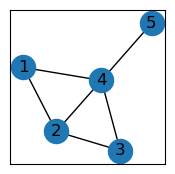

0.5

time: 100 ms (started: 2023-06-07 10:19:12 -05:00)


In [4]:
# elist = [(2, 1), (3, 2), (4, 1), (2, 4)]

elist = [(1, 2, 0.5), (2, 3, 0.6), (1, 4, 0.7), (2, 4, 0.8), (3, 4, 0.9), (4, 5, 1.0)]
G1 = nx.Graph()
G1.add_weighted_edges_from(elist)

print(G1.nodes())
print(G1.edges())

plt.figure(1,figsize=(2, 2)) 
nx.draw_networkx(G1)
plt.show()

G1.get_edge_data(2, 1, default=0)["weight"]

[1, 2, 3, 4]
[(1, 2), (1, 4), (2, 3), (2, 4)]


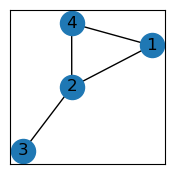

time: 88.5 ms (started: 2023-06-07 10:19:15 -05:00)


In [5]:
elist = [(1, 2, 0.5), (2, 3, 0.5), (1, 4, 0.5), (2, 4, 0.5)]
G2 = nx.Graph()
G2.add_weighted_edges_from(elist)

print(G2.nodes())
print(G2.edges())

plt.figure(1,figsize=(2, 2)) 
nx.draw_networkx(G2)
plt.show()

[1, 2, 3, 4]
[(1, 2), (1, 4), (2, 3), (2, 4)]


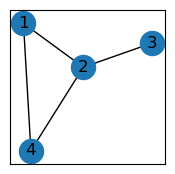

time: 75.2 ms (started: 2023-06-07 10:19:16 -05:00)


In [6]:
elist = [(1, 2, 0.5), (2, 3, 0.5), (1, 4, 0.5), (2, 4, 0.5)]
G3 = nx.Graph()
G3.add_weighted_edges_from(elist)

print(G3.nodes())
print(G3.edges())

plt.figure(1,figsize=(2, 2)) 
nx.draw_networkx(G3)
plt.show()

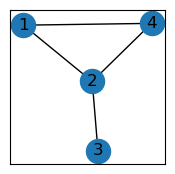

time: 76 ms (started: 2023-06-07 10:19:18 -05:00)


In [7]:
R = nx.intersection(G1, G2)

plt.figure(3,figsize=(2, 2)) 
nx.draw_networkx(R)
plt.show()


[('A1', 'B1', 0), ('A2', 'B2', 0), ('A3', 'B3', 0), ('A4', 'B4', 0), ('B1', 'C1', 0), ('B2', 'C2', 0), ('B3', 'C3', 0), ('B4', 'C4', 0)]
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4']
[('A1', 'A2'), ('A1', 'A4'), ('A1', 'B1'), ('A2', 'A3'), ('A2', 'A4'), ('A2', 'B2'), ('A3', 'A4'), ('A3', 'B3'), ('A4', 'A5'), ('A4', 'B4'), ('B1', 'B2'), ('B1', 'B4'), ('B1', 'C1'), ('B2', 'B3'), ('B2', 'B4'), ('B2', 'C2'), ('B3', 'C3'), ('B4', 'C4'), ('C1', 'C2'), ('C1', 'C4'), ('C2', 'C3'), ('C2', 'C4')]


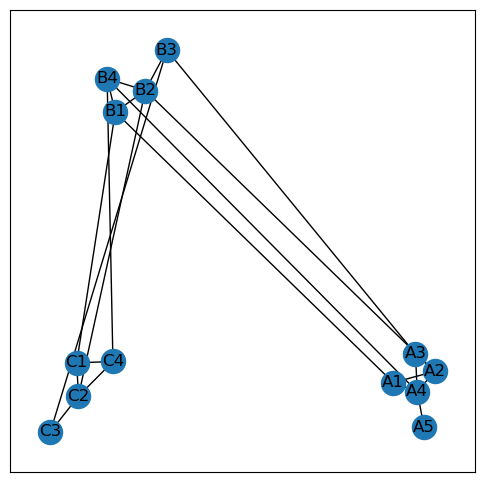

time: 246 ms (started: 2023-06-07 10:19:40 -05:00)


In [10]:
# connected pairs of nodes
list_graphs = [G1, G2, G3]
rename = [chr(k + 65) for k in range(len(list_graphs))]
list_edges = []

for k in range(len(list_graphs) - 1):
    nodes = list(list_graphs[k].nodes())
    for node in nodes:
        if list_graphs[k + 1].has_node(node):
            list_edges.append((rename[k] + str(node), rename[k + 1] + str(node), 0))
            # break

# U = nx.union(G1, G2, rename=("A", "B"))
# U = nx.full_join(G1, G2, rename=("A", "B"))
U = nx.union_all(list_graphs, rename=rename)

# append edges
U.add_weighted_edges_from(list_edges)

print()
print(list_edges)
print(U.nodes())
print(U.edges())

plt.figure(3,figsize=(6, 6)) 
nx.draw_networkx(U)
plt.show()

In [12]:
# create data
dynamic = True
dict_graphs = {}

for group in tqdm(groups_id):
    list_graphs = []
    for subgroup in tqdm(subgroups_id[group]):
        df_weighted_edges = pd.read_csv("output/{}/preprocessing/edges/edges_{}_{}.csv".format(exp, group, subgroup))
        G = nx.from_pandas_edgelist(df_weighted_edges, "source", "target", edge_attr="weight")
        list_graphs.append(G)

    rename = [chr(k + 65) for k in range(len(list_graphs))]
    list_edges = []

    for k in range(len(list_graphs) - 1):
        nodes = list(list_graphs[k].nodes())
        for node in nodes:
            if list_graphs[k + 1].has_node(node):
                list_edges.append((rename[k] + str(node), rename[k + 1] + str(node), 0))

    U = nx.union_all(list_graphs, rename=rename)
    # append edges
    U.add_weighted_edges_from(list_edges)

    mapping = dict(zip(list(U.nodes()), range(U.number_of_nodes())))
    U = nx.relabel_nodes(U, mapping)
    degree = dict(U.degree())

    df_nodes = pd.DataFrame(degree.items(), columns=["idx", "degree"])
    df_nodes["id"] = list(mapping.keys())
    df_nodes.to_csv("output/{}/preprocessing/graphs_data/nodes_data_{}_dyn.csv".format(exp, group), index=False)

    edges = list(U.edges())
    df_edges = pd.DataFrame(edges, columns=["source", "target"])
    df_edges["weight"] = [U.get_edge_data(edge[0], edge[1])["weight"] for edge in edges]
    df_edges.to_csv("output/{}/preprocessing/graphs_data/edges_data_{}_dyn.csv".format(exp, group), index=False)


100%|██████████| 3/3 [06:01<00:00, 120.55s/it]

time: 6min 1s (started: 2023-06-07 10:21:50 -05:00)


In [15]:
df_nodes = pd.read_csv("output/{}/preprocessing/graphs_data/nodes_data_{}_dyn.csv".format(exp, groups_id[0]))
df_nodes.head()

,idx,degree,id
0,0,11,A59.0049
1,1,26,A274.0123
2,2,65,A277.0867
3,3,61,A369.1213
4,4,70,A369.1541


time: 32 ms (started: 2023-06-07 13:18:32 -05:00)


In [27]:
df_nodes.query('id.str.contains("146.0685")')

,idx,degree,id
1381,1381,1198,A146.0685
7770,7770,844,B146.0685
14897,14897,958,C146.0685
19288,19288,2236,D146.0685
25093,25093,2616,E146.0685


time: 24.1 ms (started: 2023-06-07 13:56:38 -05:00)


In [28]:
df_nodes.query('id.str.contains("98.9721")')

,idx,degree,id
1222,1222,889,A98.9721
7763,7763,246,B98.9721
14868,14868,403,C98.9721
19187,19187,1700,D98.9721
24952,24952,1594,E98.9721


time: 26.6 ms (started: 2023-06-07 13:56:39 -05:00)


In [14]:
df_edges = pd.read_csv("output/{}/preprocessing/graphs_data/edges_data_{}_dyn.csv".format(exp, groups_id[0]))
print(df_edges.shape)
df_edges.head()

(12257101, 3)


,source,target,weight
0,0,1,0.629097
1,0,2,0.526495
2,0,3,0.530122
3,0,4,0.524363
4,0,5,0.504517


time: 1.85 s (started: 2023-06-07 10:28:24 -05:00)


---

In [187]:
import multiprocessing as mp
import random
import time

def some_calculations(x: float) -> float:
    # some calculations are done
    return x**2

if __name__ == "__main__":
    x_list = [k for k in range(100000000)]
    with mp.Pool(24) as p:
        x_recalculated = p.map(some_calculations, x_list)

print(x_recalculated[:20])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]
time: 22.8 s (started: 2023-06-06 17:34:31 -05:00)


In [4]:

import pymp

def ff(n):
    return [n, n]

d = 100000000
ex_array = pymp.shared.array((d, 2), dtype='int')
with pymp.Parallel(2) as p:
    for index in p.range(0, d):
        ex_array[index] = ff(index)
        # The parallel print function takes care of asynchronous output.
        # p.print('Yay! {} done!'.format(index))
ex_array

array([[       0,        0],
       [       1,        1],
       [       2,        2],
       ...,
       [99999997, 99999997],
       [99999998, 99999998],
       [99999999, 99999999]])